#  Particle Swarm Optimization


**Disusun oleh kelompok 4 :**
1. Aditya putra nugraha (09011281924060)
2. Kristi ariadi (09011281924155)
3. Muhammad Asyrof Al Jauhari (09011281924073)
4. Nurhilal Fajri (09011281924074)
5. Sa'ad Abdillah Waqas (09011281924070)
6. Rianti Agustina (09011181924150)
7. Risti Auliah Utami (09011381924099)
8. Wilda Septriyanti (09011381924101


## Penjelasan Mengenai Particle Swarm Optimization

Dalam kecerdasan komputasi, Particle Swarm Optimization atau disingkat PSO adalah metode komputasi untuk mengoptimalkan fungsi tujuan. Ini adalah metode pencarian stokastik, yang berbeda dengan banyak algoritma optimasi lainnya, tidak menghitung gradien. Ini juga biasanya digunakan dalam masalah di mana variabel mengambil nilai yang seragam.


## Variabel

Ada beberapa variabel yang perlu diinisialisasi di awal algoritma:


- n_pop: Population count
- max_iter: Maximum amount of iterrations
- v_max: Maximum velocity value
- x(i): The particle's position
- v(i): The particle's velocity
- p(i): The particle's best position yet
- f(i): The particle's best function value yet
- s_best: The swarm's best particle's position
- s_fbest: The swarm's best particle's best function value yet
- f_best: The best objective value of the function

Nilai objektif terbaik dari fungsi tidak selalu ada dan tidak digunakan di semua variasi algoritma.

## How it works

Cara kerjanya adalah dengan iteratif meningkatkan solusi kandidat dari populasi partikel (swarm), dengan memindahkan partikel-partikel ini di sekitar. Masing-masing partikel ini menyadari posisi terbaik mereka di ruang pencarian, serta posisi terbaik swarm juga diketahui. Berdasarkan asumsi tersebut, swarm diharapkan bergerak menuju solusi (posisi) terbaik.

Untuk memperbarui posisi setiap partikel, berikut rumus yang harus diikuti :

Istilah c1*r1*(p(i)-x(i)) dikenal sebagai koefisien pribadi sedangkan istilah c2*r2*(s_best-x(i)) dikenal sebagai koefisien sosial

c1 adalah faktor koefisien pribadi
c2 adalah faktor koefisien sosial
r1,r2 adalah bilangan acak dari ruang seragam [0,1]

## Source Code and Explanation

Berikut merupakan kode pemograman untuk memproses penerapan Particle Swarm Optimization beserta penjelasan perbaris kodenya :

###  Import Library

In [4]:
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

Pada baris kode tersebut diimport terlebih dahulu library-library yang digunakan di dalam pemograman Particle Swarm Optimization yang akan dibuat ini.

###  Variabel

In [5]:
DIMENSIONS = 2              # Jumlah dimensi
GLOBAL_BEST = 0             # Fungsi Cost Global Terbaik
B_LO = -5                   # Batas atas ruang pencarian
B_HI = 5                    # Batas atas ruang pencarian

POPULATION = 20             # Jumlah partikel dalam swarm
V_MAX = 0.1                 # Nilai kecepatan maksimum
PERSONAL_C = 2.0            # Faktor personal koefisien
SOCIAL_C = 2.0              # Faktor social koefisien
CONVERGENCE = 0.001         # Nilai konvergensi
MAX_ITER = 100              # Jumlah maksimum iterasi

Baris kode di atas merupakan pendefinisian variabel beserta nilai daripada variabel yang digunakan pada program PSO yang dibuat.

###  Particle class

Berikut merupakan baris kode untuk membuat class partikel. Dimana di dalam class particle ini didefinisikan variabel self, x, y,z, dan velocity.

In [6]:
class Particle():
    def __init__(self, x, y, z, velocity):
        self.pos = [x, y]
        self.pos_z = z
        self.velocity = velocity
        self.best_pos = self.pos.copy()

###  Swarm Class

Berikut merupakan baris kode untuk membuat Swarm Class. 

In [8]:
class Swarm():
    def __init__(self, pop, v_max):
        self.particles = []             # Daftar patikel pada kelompok
        self.best_pos = None            # Partikel terbaik pada kelompok 
        self.best_pos_z = math.inf      # Partikel terbaik pada kelompok 

        for _ in range(pop):
            x = np.random.uniform(B_LO, B_HI)
            y = np.random.uniform(B_LO, B_HI)
            z = cost_function(x, y)
            velocity = np.random.rand(2) * v_max
            particle = Particle(x, y, z, velocity)
            self.particles.append(particle)
            if self.best_pos != None and particle.pos_z < self.best_pos_z:
                self.best_pos = particle.pos.copy()
                self.best_pos_z = particle.pos_z
            else:
                self.best_pos = particle.pos.copy()
                self.best_pos_z = particle.pos_z

### Proses Evalusasi, Inisialisi dan Update pada Program

Berikut kode untuk melakukan evaluasi, inisialisasi dan update untuk mendapatkan hasil Optimasi Partikel Swarm. Pada kode program di bawah ini telah dijelaskan fungsi daripada kode program itu dengan memasukan komentar di dalam program.

In [18]:
# Evaluasi tujuan atau fungsi cost (ackley)
def cost_function(x, y, a=20, b=0.2, c=2*math.pi):
    term_1 = np.exp((-b * np.sqrt(0.5 * (x ** 2 + y ** 2))))
    term_2 = np.exp((np.cos(c * x) + np.cos(c * y)) / 2)
    return -1 * a * term_1 - term_2 + a + np.exp(1)

def particle_swarm_optimization():

    # Inisialisasi plot variabel
    x = np.linspace(B_LO, B_HI, 50)
    y = np.linspace(B_LO, B_HI, 50)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure("Particle Swarm Optimization")

    # Inisialisasi kelompok
    swarm = Swarm(POPULATION, V_MAX)

    # Inisialisasi inertia weight
    inertia_weight = 0.5 + (np.random.rand()/2)
    
    curr_iter = 0
    while curr_iter < MAX_ITER:

        fig.clf()
        ax = fig.add_subplot(1, 1, 1)
        ac = ax.contourf(X, Y, cost_function(X, Y), cmap='viridis')
        fig.colorbar(ac)

        for particle in swarm.particles:

            for i in range(0, DIMENSIONS):
                r1 = np.random.uniform(0, 1)
                r2 = np.random.uniform(0, 1)
                
                # Update velocity partikel
                personal_coefficient = PERSONAL_C * r1 * (particle.best_pos[i] - particle.pos[i])
                social_coefficient = SOCIAL_C * r2 * (swarm.best_pos[i] - particle.pos[i])
                new_velocity = inertia_weight * particle.velocity[i] + personal_coefficient + social_coefficient

                # Pemeriksaan apakah velocity melampaui
                if new_velocity > V_MAX:
                    particle.velocity[i] = V_MAX
                elif new_velocity < -V_MAX:
                    particle.velocity[i] = -V_MAX
                else:
                    particle.velocity[i] = new_velocity

            ax.scatter(particle.pos[0], particle.pos[1], marker='*', c='r')
            ax.arrow(particle.pos[0], particle.pos[1], particle.velocity[0], particle.velocity[1], head_width=0.1, head_length=0.1, color='k')

            # Pembaruan posisi partikel saat ini
            particle.pos += particle.velocity
            particle.pos_z = cost_function(particle.pos[0], particle.pos[1])

            # Pembaruan formasi posisi terbaik
            if particle.pos_z < cost_function(particle.best_pos[0], particle.best_pos[1]):
                particle.best_pos = particle.pos.copy()

                # Pembaruan formasi kelompok terbaik
                if particle.pos_z < swarm.best_pos_z:
                    swarm.best_pos = particle.pos.copy()
                    swarm.best_pos_z = particle.pos_z
                    
            # Periksa apakah partikel berada dalam batas
            if particle.pos[0] > B_HI:
                particle.pos[0] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])
            if particle.pos[1] > B_HI:
                particle.pos[1] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])
            if particle.pos[0] < B_LO:
                particle.pos[0] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])
            if particle.pos[1] < B_LO:
                particle.pos[1] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])

        plt.subplots_adjust(right = 0.95)
        plt.pause(0.00001)

        # Mengecek Konfergen
        if abs(swarm.best_pos_z - GLOBAL_BEST) < CONVERGENCE:
            print("The swarm has met convergence criteria after " + str(curr_iter) + " iterrations.")
            break
        curr_iter += 1
    plt.show()

### Hasil dan Analisis Program

Berikut merupakan hasil daripada program setelah dijalankan. Dapat dilihat pada hasil program di bawah ini. Kumpulan particle tersebut menyebar lalu menghitung jarak antara masing-masing partikel lalu menghitung jarak dengan target. Seperti yang kita tahu bahwa Cara kerja PSO menyerupai sekumpulan burung atau ikan dalam menemukan sumber makanan dimana setiap individu disebut partikel dan populasi disebut swarm (koloni). PSO diinisialisasi dengan sekumpulan partikel sebagai kandidat solusi pada posisi acak. Setiap partikel diberikan posisi awal dan kecepatan awal.

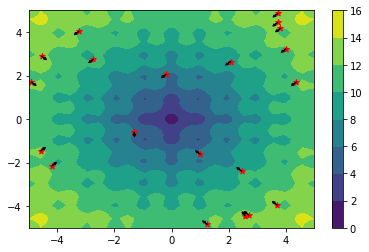

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

The swarm has met convergence criteria after 99 iterrations.


In [19]:
if __name__ == "__main__":
    particle_swarm_optimization()